# Loan Assesment Logistic Regressions

In [94]:
import pandas as pd
import numpy as np
import math
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Get the Loan History Data

In [95]:
ls

1564688933_LoansTrainingSet.csv
1564688942_LoansTraining data dictionary.docx
HackDay#1.ipynb
README.md
Untitled.ipynb
znotebook/


In [96]:
df = pd.read_csv('1564688933_LoansTrainingSet.csv')

### Show basic information of the Loan History Data

In [97]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         256984 non-null object
Customer ID                     256984 non-null object
Loan Status                     256984 non-null object
Current Loan Amount             256984 non-null int64
Term                            256984 non-null object
Credit Score                    195308 non-null float64
Years in current job            245508 non-null object
Home Ownership                  256984 non-null object
Annual Income                   195308 non-null float64
Purpose                         256984 non-null object
Monthly Debt                    256984 non-null object
Years of Credit History         256984 non-null float64
Months since last delinquent    116601 non-null float64
Number of Open Accounts         256984 non-null int64
Number of Credit Problems       256984 non-null int64
Current Credit Balance          256984 non-null int64
Maximum O

In [99]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [100]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


### Visualize the Raw numerical attributes as histograms

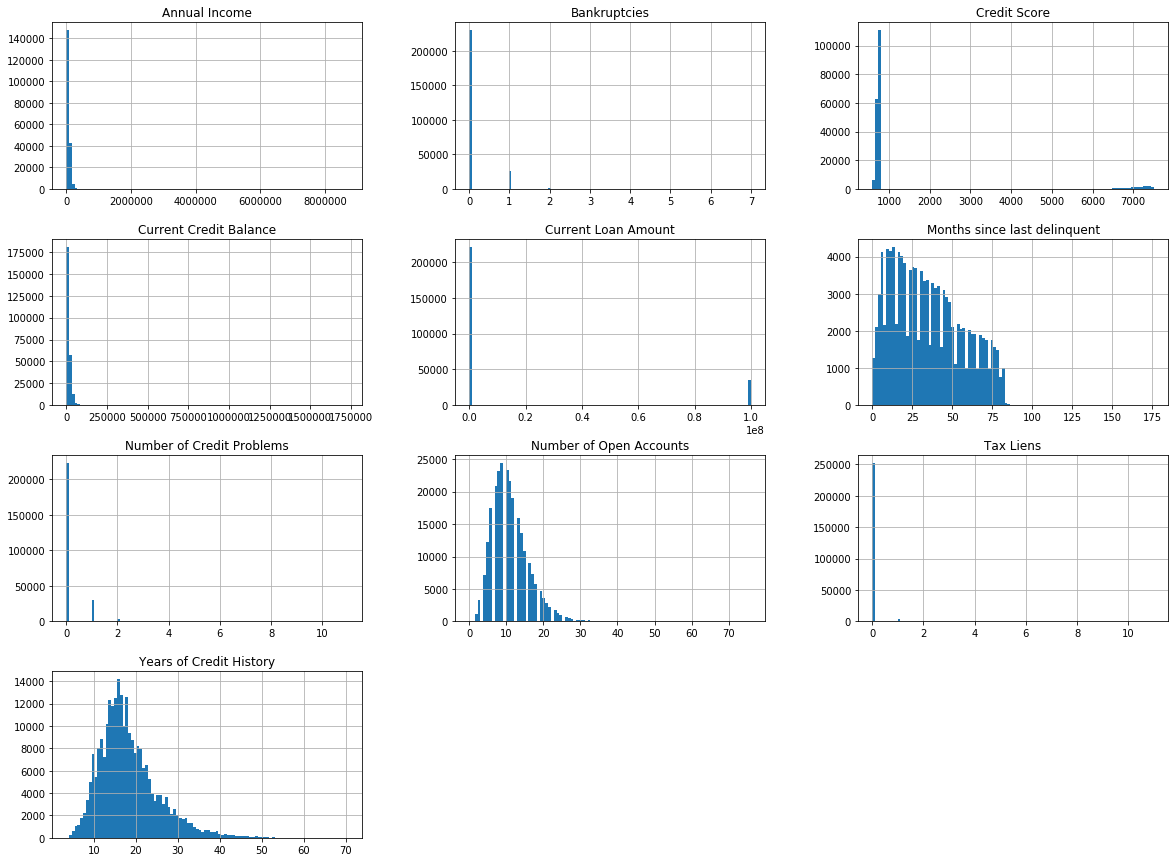

In [101]:
%matplotlib inline

df.hist(bins=100, figsize=(20,15))
plt.show()

In [102]:
df.corr()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.139743,0.024069,0.014725,0.003488,-0.003094,-0.000062,0.003138,0.003576,-0.003069
Credit Score,-0.139743,1.000000,-0.033221,-0.011658,-0.007994,0.008124,0.000777,-0.003263,-0.003426,0.004381
Annual Income,0.024069,-0.033221,1.000000,0.146859,-0.059675,0.140463,-0.013672,0.292165,-0.044837,0.038185
Years of Credit History,0.014725,-0.011658,0.146859,1.000000,-0.039695,0.128033,0.061251,0.201001,0.062049,0.020915
Months since last delinquent,0.003488,-0.007994,-0.059675,-0.039695,1.000000,-0.035803,0.088612,-0.024292,0.112907,0.002730
Number of Open Accounts,-0.003094,0.008124,0.140463,0.128033,-0.035803,1.000000,-0.013731,0.222763,-0.022805,0.005754
Number of Credit Problems,-0.000062,0.000777,-0.013672,0.061251,0.088612,-0.013731,1.000000,-0.103814,0.755866,0.584917
Current Credit Balance,0.003138,-0.003263,0.292165,0.201001,-0.024292,0.222763,-0.103814,1.000000,-0.117995,-0.011118
Bankruptcies,0.003576,-0.003426,-0.044837,0.062049,0.112907,-0.022805,0.755866,-0.117995,1.000000,0.046160
Tax Liens,-0.003069,0.004381,0.038185,0.020915,0.002730,0.005754,0.584917,-0.011118,0.046160,1.000000


In [103]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


### Clean up the data

In [104]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [105]:
df['Credit Score'] = df['Credit Score'].map(lambda x: x/10 if x>850 else x)

In [106]:
df['Years in current job'].unique()

array(['10+ years', '4 years', '6 years', '5 years', nan, '3 years',
       '2 years', '< 1 year', '1 year', '7 years', '9 years', '8 years'],
      dtype=object)

In [107]:
df['Years in current job'].replace(to_replace=["years","year","<","\+"," "],value="", regex=True, inplace=True)

In [108]:
df['Years in current job'].unique()

array(['10', '4', '6', '5', nan, '3', '2', '1', '7', '9', '8'],
      dtype=object)

In [109]:
df['Years in current job'] = df['Years in current job'].apply(pd.to_numeric, errors='coerce')

In [110]:
df['Monthly Debt'] = df['Monthly Debt'].replace(["\$",","],"",regex=True).astype(float)

In [111]:
df[df['Maximum Open Credit'] == "#VALUE!"]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
184662,b798f46b-e27b-4823-af83-294b1ffc3490,f61890c5-e264-4b0f-a047-9cfa03b9d182,Charged Off,1470,Short Term,NaN,2.0,Rent,NaN,Debt Consolidation,506.34,15.3,26.0,3,0,0,#VALUE!,0.0,0.0
184663,b798f46b-e27b-4823-af83-294b1ffc3490,f61890c5-e264-4b0f-a047-9cfa03b9d182,Charged Off,1470,Short Term,725.0,2.0,Rent,39200.0,Debt Consolidation,506.34,15.3,26.0,3,0,0,#VALUE!,0.0,0.0
187512,ba8f310d-7688-40e9-aa1c-30237dcaf051,80acb6ec-105f-42e4-bdd0-6c4792b88e71,Charged Off,23897,Long Term,697.0,7.0,Home Mortgage,49785.0,Home Improvements,1306.86,13.0,NaN,6,0,0,#VALUE!,0.0,0.0
187513,ba8f310d-7688-40e9-aa1c-30237dcaf051,80acb6ec-105f-42e4-bdd0-6c4792b88e71,Charged Off,23897,Long Term,697.0,7.0,Home Mortgage,49785.0,Home Improvements,1306.86,13.0,NaN,6,0,0,#VALUE!,0.0,0.0


In [112]:
df['Maximum Open Credit'] = df['Maximum Open Credit'].apply(pd.to_numeric, errors='coerce')
df['Maximum Open Credit'].head()

0    16056.0
1    19149.0
2    28335.0
3    43915.0
4    37081.0
Name: Maximum Open Credit, dtype: float64

In [113]:
#df['Parsed_MaxOpenCredit'] = pd.DataFrame(ParseMaxOpenCredit())

In [114]:
df = df.drop(['Customer ID','Loan ID', 'Months since last delinquent'],axis=1)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 16 columns):
Loan Status                  256984 non-null object
Current Loan Amount          256984 non-null int64
Term                         256984 non-null object
Credit Score                 195308 non-null float64
Years in current job         245508 non-null float64
Home Ownership               256984 non-null object
Annual Income                195308 non-null float64
Purpose                      256984 non-null object
Monthly Debt                 256984 non-null float64
Years of Credit History      256984 non-null float64
Number of Open Accounts      256984 non-null int64
Number of Credit Problems    256984 non-null int64
Current Credit Balance       256984 non-null int64
Maximum Open Credit          256980 non-null float64
Bankruptcies                 256455 non-null float64
Tax Liens                    256961 non-null float64
dtypes: float64(8), int64(4), object(4)
memory usage:

In [116]:
df[df['Current Loan Amount'] == 99999999]

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
10,Fully Paid,99999999,Short Term,742.0,3.0,Home Mortgage,64760.0,Debt Consolidation,582.84,26.8,11,0,8880,22711.0,0.0,0.0
16,Fully Paid,99999999,Short Term,744.0,6.0,Home Mortgage,65605.0,Debt Consolidation,984.07,21.0,5,1,11514,17262.0,1.0,0.0
23,Fully Paid,99999999,Short Term,745.0,10.0,Rent,39476.0,other,483.58,15.4,12,0,4636,21171.0,0.0,0.0
28,Fully Paid,99999999,Short Term,724.0,1.0,Own Home,34297.0,Home Improvements,777.38,13.6,12,0,6720,53335.0,0.0,0.0
42,Fully Paid,99999999,Short Term,750.0,10.0,Own Home,86785.0,Other,56.41,22.0,7,0,3959,63862.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256938,Fully Paid,99999999,Short Term,663.0,8.0,Home Mortgage,108482.0,Home Improvements,1365.07,20.3,13,0,17264,23174.0,0.0,0.0
256953,Fully Paid,99999999,Short Term,698.0,7.0,Rent,65941.0,Debt Consolidation,1364.97,21.5,16,0,19104,23556.0,0.0,0.0
256954,Fully Paid,99999999,Short Term,742.0,10.0,Rent,118128.0,Debt Consolidation,2608.66,17.0,17,0,35089,55520.0,0.0,0.0
256963,Fully Paid,99999999,Short Term,738.0,10.0,Rent,34749.0,Debt Consolidation,833.98,11.0,17,0,3146,16050.0,0.0,0.0


In [117]:
medianCurrentLoanAmount = df[df['Current Loan Amount'] < 99999999]['Current Loan Amount'].median()
df['Current Loan Amount'] = df['Current Loan Amount'].apply(lambda x : medianCurrentLoanAmount if x==99999999 else x)

In [118]:
df['Annual Income'] = df['Annual Income'].fillna(df['Annual Income'].median())

In [119]:
df['Loan Status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [120]:
df['Loan Status'] = df['Loan Status'].replace('Fully Paid',1).replace('Charged Off',0)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 16 columns):
Loan Status                  256984 non-null int64
Current Loan Amount          256984 non-null float64
Term                         256984 non-null object
Credit Score                 195308 non-null float64
Years in current job         245508 non-null float64
Home Ownership               256984 non-null object
Annual Income                256984 non-null float64
Purpose                      256984 non-null object
Monthly Debt                 256984 non-null float64
Years of Credit History      256984 non-null float64
Number of Open Accounts      256984 non-null int64
Number of Credit Problems    256984 non-null int64
Current Credit Balance       256984 non-null int64
Maximum Open Credit          256980 non-null float64
Bankruptcies                 256455 non-null float64
Tax Liens                    256961 non-null float64
dtypes: float64(9), int64(4), object(3)
memory usage

## Visualize Numeric data after cleanup

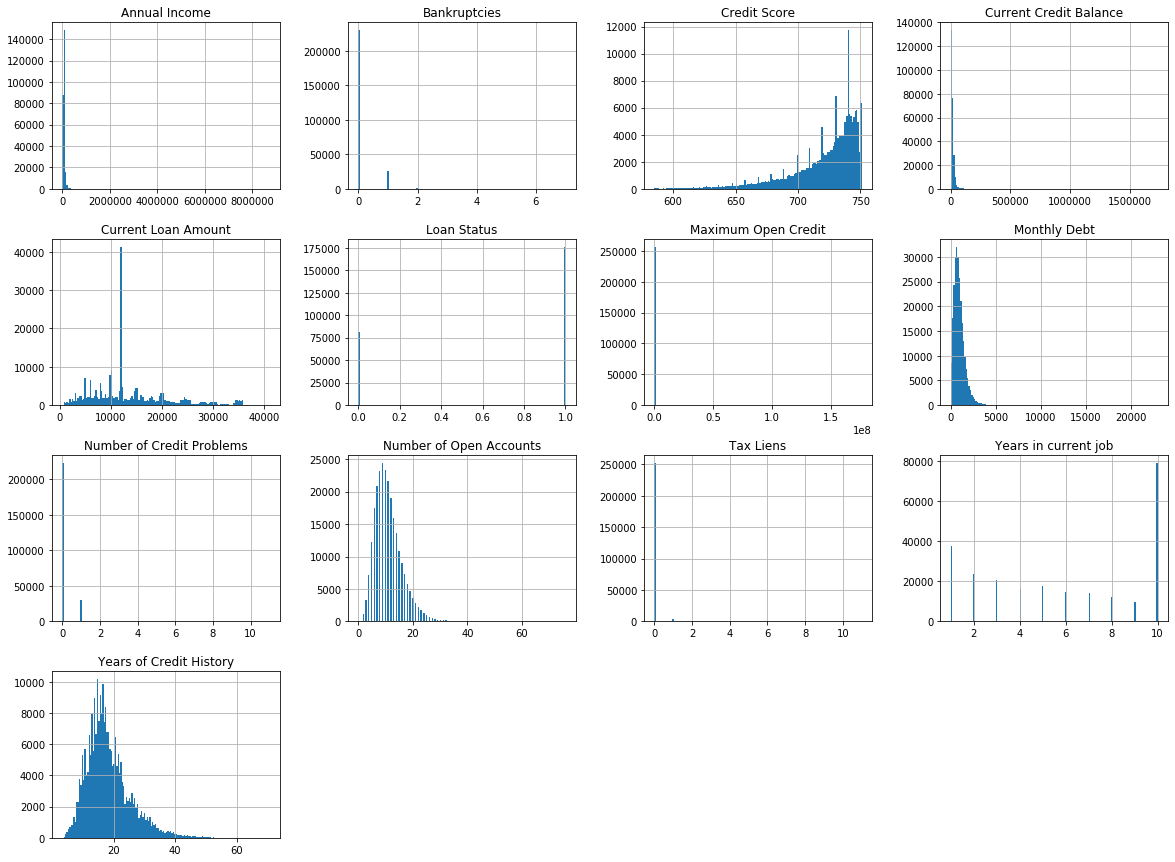

In [122]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=150, figsize=(20,15))
plt.show()

## Parsing Categorical Variables 

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 16 columns):
Loan Status                  256984 non-null int64
Current Loan Amount          256984 non-null float64
Term                         256984 non-null object
Credit Score                 195308 non-null float64
Years in current job         245508 non-null float64
Home Ownership               256984 non-null object
Annual Income                256984 non-null float64
Purpose                      256984 non-null object
Monthly Debt                 256984 non-null float64
Years of Credit History      256984 non-null float64
Number of Open Accounts      256984 non-null int64
Number of Credit Problems    256984 non-null int64
Current Credit Balance       256984 non-null int64
Maximum Open Credit          256980 non-null float64
Bankruptcies                 256455 non-null float64
Tax Liens                    256961 non-null float64
dtypes: float64(9), int64(4), object(3)
memory usage

In [124]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,11520.0,Short Term,741.0,10.0,Home Mortgage,33694.0,Debt Consolidation,584.03,12.3,10,0,6760,16056.0,0.0,0.0
1,1,3441.0,Short Term,734.0,4.0,Home Mortgage,42269.0,other,1106.04,26.3,17,0,6262,19149.0,0.0,0.0
2,1,21029.0,Short Term,747.0,10.0,Home Mortgage,90126.0,Debt Consolidation,1321.85,28.8,5,0,20967,28335.0,0.0,0.0
3,1,18743.0,Short Term,747.0,10.0,Own Home,38072.0,Debt Consolidation,751.92,26.2,9,0,22529,43915.0,0.0,0.0
4,1,11731.0,Short Term,746.0,4.0,Rent,50025.0,Debt Consolidation,355.18,11.5,12,0,17391,37081.0,0.0,0.0


In [52]:
from IPython.core.display import display, HTML
HTML('''<script> </script> <form action="javascript:IPython.notebook.execute_cells_above()"><input type="submit" id="toggleButton" value="Run all"></form>''')

In [125]:
df.Term.unique()

array(['Short Term', 'Long Term'], dtype=object)

In [126]:
df['Home Ownership'].unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], dtype=object)

In [127]:
df['Home Ownership'] = df['Home Ownership'].replace("HaveMortgage",'Home Mortgage')

In [128]:
df.Purpose.unique()

array(['Debt Consolidation', 'other', 'Business Loan',
       'Home Improvements', 'Buy House', 'Other', 'Buy a Car',
       'Medical Bills', 'Take a Trip', 'Educational Expenses'],
      dtype=object)

In [129]:
df.Purpose = df.Purpose.replace("Other","other")

In [131]:
df = pd.get_dummies(df, drop_first = True)

In [132]:
df.head()

,Loan Status,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,...,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Take a Trip,Purpose_other
0,1,11520.0,741.0,10.0,33694.0,584.03,12.3,10,0,6760,...,0,0,0,0,1,0,0,0,0,0
1,1,3441.0,734.0,4.0,42269.0,1106.04,26.3,17,0,6262,...,0,0,0,0,0,0,0,0,0,1
2,1,21029.0,747.0,10.0,90126.0,1321.85,28.8,5,0,20967,...,0,0,0,0,1,0,0,0,0,0
3,1,18743.0,747.0,10.0,38072.0,751.92,26.2,9,0,22529,...,1,0,0,0,1,0,0,0,0,0
4,1,11731.0,746.0,4.0,50025.0,355.18,11.5,12,0,17391,...,0,1,0,0,1,0,0,0,0,0


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 24 columns):
Loan Status                     256984 non-null int64
Current Loan Amount             256984 non-null float64
Credit Score                    195308 non-null float64
Years in current job            245508 non-null float64
Annual Income                   256984 non-null float64
Monthly Debt                    256984 non-null float64
Years of Credit History         256984 non-null float64
Number of Open Accounts         256984 non-null int64
Number of Credit Problems       256984 non-null int64
Current Credit Balance          256984 non-null int64
Maximum Open Credit             256980 non-null float64
Bankruptcies                    256455 non-null float64
Tax Liens                       256961 non-null float64
Term_Short Term                 256984 non-null uint8
Home Ownership_Own Home         256984 non-null uint8
Home Ownership_Rent             256984 non-null uint8
Purpose

In [134]:
df.isnull().sum()

Loan Status                         0
Current Loan Amount                 0
Credit Score                    61676
Years in current job            11476
Annual Income                       0
Monthly Debt                        0
Years of Credit History             0
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 4
Bankruptcies                      529
Tax Liens                          23
Term_Short Term                     0
Home Ownership_Own Home             0
Home Ownership_Rent                 0
Purpose_Buy House                   0
Purpose_Buy a Car                   0
Purpose_Debt Consolidation          0
Purpose_Educational Expenses        0
Purpose_Home Improvements           0
Purpose_Medical Bills               0
Purpose_Take a Trip                 0
Purpose_other                       0
dtype: int64

In [135]:
df['Credit Score'] = df['Credit Score'].fillna(df['Credit Score'].median())
df['Years in current job'] = df['Years in current job'].fillna(df['Years in current job'].median())
df['Bankruptcies'] = df['Bankruptcies'].fillna(df['Bankruptcies'].median())
df['Tax Liens'] = df['Tax Liens'].fillna(df['Tax Liens'].median())
df['Maximum Open Credit'] = df['Maximum Open Credit'].fillna(df['Maximum Open Credit'].median())

In [138]:
df.isnull().sum().sum()

0

In [142]:
abs(df.corr()["Loan Status"].sort_values(ascending = False))

Loan Status                     1.000000
Credit Score                    0.230681
Term_Short Term                 0.183811
Annual Income                   0.061182
Years of Credit History         0.035548
Purpose_Buy a Car               0.024949
Purpose_Home Improvements       0.022265
Current Credit Balance          0.008838
Maximum Open Credit             0.007922
Years in current job            0.004146
Purpose_Buy House               0.003706
Bankruptcies                    0.001107
Purpose_Educational Expenses    0.000505
Purpose_Take a Trip             0.000259
Purpose_Debt Consolidation      0.001793
Purpose_other                   0.004531
Purpose_Medical Bills           0.005133
Home Ownership_Own Home         0.008300
Number of Credit Problems       0.010179
Tax Liens                       0.012590
Monthly Debt                    0.016609
Number of Open Accounts         0.020787
Home Ownership_Rent             0.062959
Current Loan Amount             0.090241
Name: Loan Statu

## Combine the Numeric and Categorical Data

In [ ]:
df = df[['Fully_Paid', 'Current Loan Amount','Parsed_CreditScore','Short Term', 'Annual Income', 'Home Mortgage', 'Rent', 'Parsed_MaxOpenCredit', 'Number of Open Accounts', 'Parsed_MonthlyDebt', 'Years of Credit History', 'Buy a Car', 'Current Credit Balance', 'other']]

## Feature Engineering

In [ ]:
df['Annual Income'] = df['Annual Income'].replace(0,1)
df['IncomeRatio'] = df['Parsed_MonthlyDebt']/df['Annual Income']/12.0

In [ ]:
df = df.drop(['Annual Income', 'Parsed_MonthlyDebt'], axis = 1)

In [ ]:
df = df.drop_duplicates()

In [ ]:
abs(df.corr()['Fully_Paid']).sort_values(ascending=False)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=100, figsize=(20,15))
plt.show()

## Regression Tests

In [ ]:
def algo_test(dataset, y_name):
    
    g = GaussianNB()
    b = BernoulliNB()
    k = KNeighborsClassifier()
    log = LogisticRegression()
    gbc = GradientBoostingClassifier()
    d = DecisionTreeClassifier()
    r = RandomForestClassifier()
    
    x = dataset.drop(y_name,axis = 1) 
    y = dataset[y_name]
    
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.1,random_state=13)
    
    algos = [g,b,k,log,d,r,gbc]
    algo_names = ['GaussianNB', 'BernoulliNB', 'K Nearest', 'Logistic','Single Tree','Random Forest','Gradient Boost']
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
    
    result = pd.DataFrame(columns = ['Accuracy', 'Precision', 'Recall', 'F1'], index = algo_names)
    
    #result.index.name = 'Algorithms'
    
    for algo in algos:
        algo.fit(x_train,y_train)
        algo.predict(x_test)
        
        accuracy.append(accuracy_score(y_test, algo.predict(x_test)))
        precision.append(precision_score(y_test, algo.predict(x_test)))
        recall.append(recall_score(y_test, algo.predict(x_test)))
        f1.append(f1_score(y_test, algo.predict(x_test)))
    
    result.Accuracy = accuracy
    result.Precision = precision
    result.Recall = recall
    result.F1 = f1
    
    return result.sort_values('F1', ascending=False)

In [ ]:
algo_test(df,'Fully_Paid')

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
model = KMeans(n_clusters=3)
x = df.drop('Fully_Paid',axis=1)
model=model.fit(x)
pred=model.predict(x)
x['group'] = pred

x['Fully_Paid'] = df['Fully_Paid']
x0 = x[x.group == 0]
x1 = x[x.group == 1]
x2 = x[x.group == 2]


x0 = x0.drop(['group'], axis=1)
x1 = x1.drop(['group'], axis=1)
x2 = x2.drop(['group'], axis=1)


plt.figure(figsize=(10,6))
plt.scatter(x['Current Loan Amount'], x['Fully_Paid'], c=pred) 
plt.legend()
plt.colorbar()
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x['Parsed_CreditScore'], x['Fully_Paid'], c=pred) 
plt.legend()
plt.colorbar()
plt.show()

In [ ]:
x0.describe()

In [ ]:
x1.describe()

In [ ]:
x2.describe()

In [ ]:
algo_test(x0,'Fully_Paid')

In [ ]:
algo_test(x1,'Fully_Paid')

In [ ]:
algo_test(x2,'Fully_Paid')